In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [38]:
data_train.shape

(119017, 8)

In [11]:
data_train = pd.read_csv("data/preprocessed_train.csv")
data_train.drop("Unnamed: 0", axis=1, inplace=True)
data_test = pd.read_csv("data/preprocessed_test.csv")
data_test.drop("Unnamed: 0", axis=1, inplace=True)
data_train.head()

,Class Index,Title,Description,Class,Text
0,3,Wall St. Bears Claw Back Into the Black,"Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",2,wall st bears claw back into the black shortsellers wall streets dwindlingband of ultracynics are seeing green again
1,3,Carlyle Looks Toward Commercial Aerospace,"Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",2,carlyle looks toward commercial aerospace private investment firm carlyle groupwhich has a reputation for making welltimed and occasionallycontroversial plays in the defense industry has quietly placedits bets on another part of the market
2,3,Oil and Economy Cloud Stocks' Outlook,Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,2,oil and economy cloud stocks outlook soaring crude prices plus worriesabout the economy and the outlook for earnings are expected tohang over the stock market next week during the depth of thesummer doldrums
3,3,Iraq Halts Oil Exports from Main Southern Pipeline,"Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.",2,iraq halts oil exports from main southern pipeline authorities have halted oil exportflows from the main pipeline in southern iraq afterintelligence showed a rebel militia could strikeinfrastructure an oil official said on saturday
4,3,"Oil prices soar to all-time record, posing new menace to US economy","Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.",2,oil prices soar to alltime record posing new menace to us economy tearaway world oil prices toppling records and straining wallets present a new economic menace barely three months before the us presidential elections


In [16]:
# map labels to easy-understanding words
label_map={
    0:'World',
    1:'Sports',
    2:'Business',
    3:'Sci/Tech'
}
data_test['Label_String'] = data_test["Class"].map(label_map)
data_train['Label_String'] = data_train["Class"].map(label_map)
data_train.head()

,Class Index,Title,Description,Class,Text,Label_String
0,3,Wall St. Bears Claw Back Into the Black,"Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",2,wall st bears claw back into the black shortsellers wall streets dwindlingband of ultracynics are seeing green again,Business
1,3,Carlyle Looks Toward Commercial Aerospace,"Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",2,carlyle looks toward commercial aerospace private investment firm carlyle groupwhich has a reputation for making welltimed and occasionallycontroversial plays in the defense industry has quietly placedits bets on another part of the market,Business
2,3,Oil and Economy Cloud Stocks' Outlook,Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,2,oil and economy cloud stocks outlook soaring crude prices plus worriesabout the economy and the outlook for earnings are expected tohang over the stock market next week during the depth of thesummer doldrums,Business
3,3,Iraq Halts Oil Exports from Main Southern Pipeline,"Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.",2,iraq halts oil exports from main southern pipeline authorities have halted oil exportflows from the main pipeline in southern iraq afterintelligence showed a rebel militia could strikeinfrastructure an oil official said on saturday,Business
4,3,"Oil prices soar to all-time record, posing new menace to US economy","Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.",2,oil prices soar to alltime record posing new menace to us economy tearaway world oil prices toppling records and straining wallets present a new economic menace barely three months before the us presidential elections,Business


In [17]:
# calculate text length
data_train['Text_Length'] = data_train['Text'].str.len()
data_train['Word_Count'] = data_train['Text'].str.split().str.len()
data_train.head()

,Class Index,Title,Description,Class,Text,Label_String,Text_Length,Word_Count
0,3,Wall St. Bears Claw Back Into the Black,"Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",2,wall st bears claw back into the black shortsellers wall streets dwindlingband of ultracynics are seeing green again,Business,116,18
1,3,Carlyle Looks Toward Commercial Aerospace,"Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",2,carlyle looks toward commercial aerospace private investment firm carlyle groupwhich has a reputation for making welltimed and occasionallycontroversial plays in the defense industry has quietly placedits bets on another part of the market,Business,239,33
2,3,Oil and Economy Cloud Stocks' Outlook,Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,2,oil and economy cloud stocks outlook soaring crude prices plus worriesabout the economy and the outlook for earnings are expected tohang over the stock market next week during the depth of thesummer doldrums,Business,207,33
3,3,Iraq Halts Oil Exports from Main Southern Pipeline,"Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.",2,iraq halts oil exports from main southern pipeline authorities have halted oil exportflows from the main pipeline in southern iraq afterintelligence showed a rebel militia could strikeinfrastructure an oil official said on saturday,Business,231,33
4,3,"Oil prices soar to all-time record, posing new menace to US economy","Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.",2,oil prices soar to alltime record posing new menace to us economy tearaway world oil prices toppling records and straining wallets present a new economic menace barely three months before the us presidential elections,Business,217,34


(0.0, 512.0)

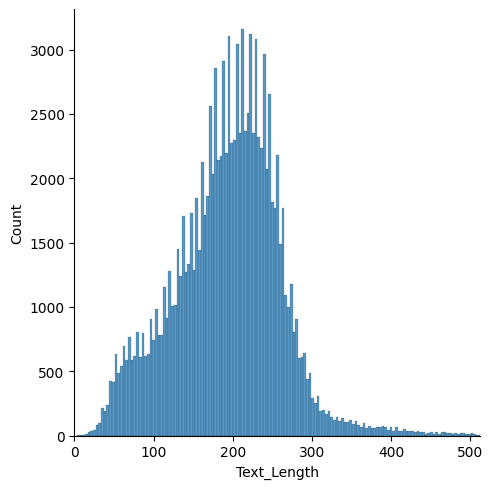

In [20]:
sns.displot(data_train['Text_Length'])
plt.xlim([0, 512])

<Axes: xlabel='Label_String', ylabel='Text_Length'>

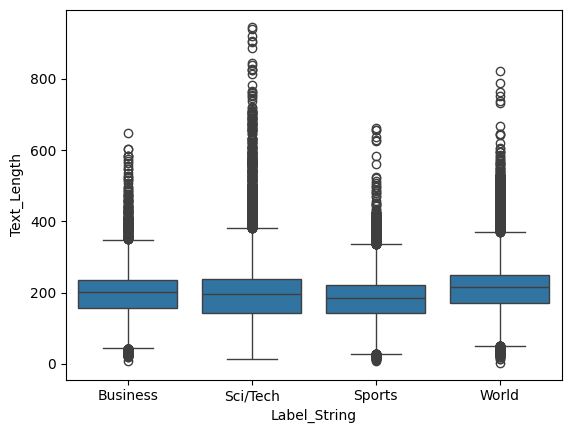

In [21]:
sns.boxplot(x="Label_String", y="Text_Length", data=data_train)

<Axes: xlabel='Label_String', ylabel='Word_Count'>

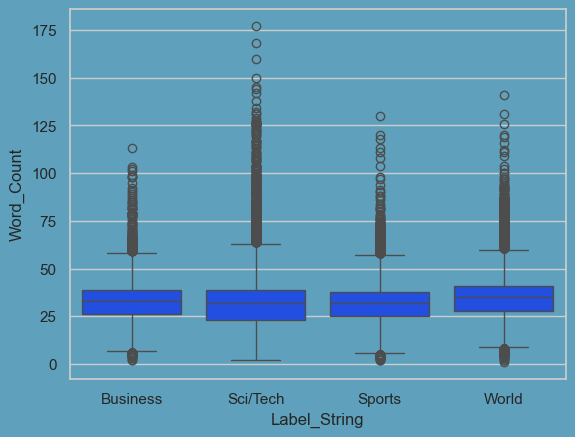

In [24]:
sns.boxplot(x="Label_String", y="Word_Count", data=data_train)

Label_String
Sports      29889
World       29817
Business    29798
Sci/Tech    29513
Name: count, dtype: int64


C:\Users\Andrija Lukic\AppData\Local\Temp\ipykernel_5968\3295348164.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)


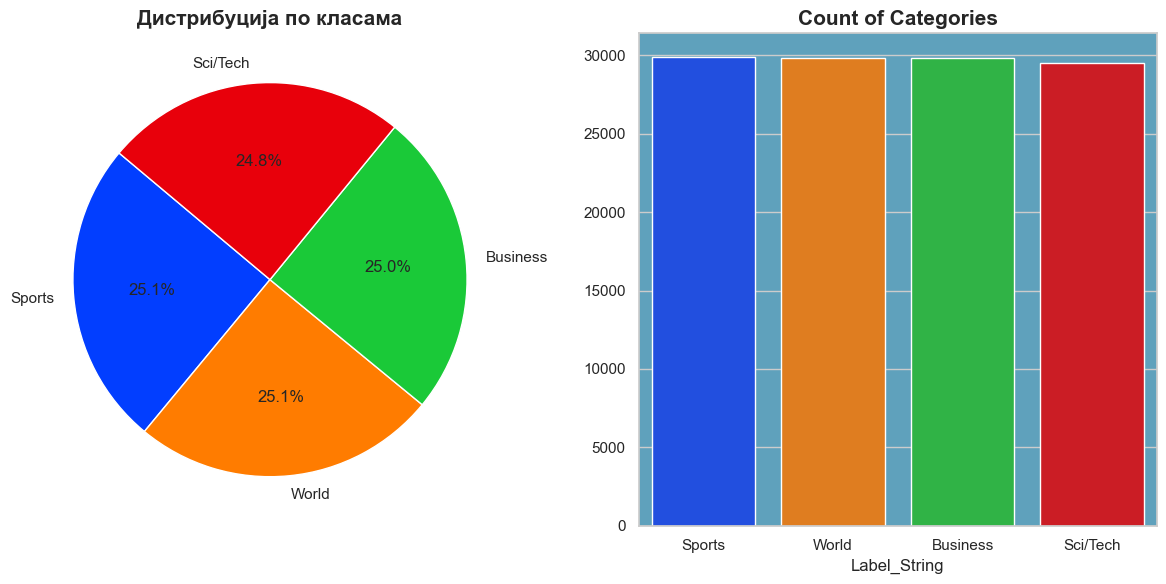

In [39]:
# Value count of 'label'
count = data_train['Label_String'].value_counts()
print(count)
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot pie chart on the first subplot
palette = sns.color_palette("bright", len(count))
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Дистрибуција по класама', fontsize=15, fontweight='bold')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
axs[1].set_title('Count of Categories', fontsize=15, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()